In [1]:
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import pyart


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



In [11]:
radar = pyart.io.read('MDV-20150805-084449-PPIVol.nc')
display = pyart.graph.RadarMapDisplay(radar)

In [36]:
radar.info()

altitude:
	data: <ndarray of type: float64 and shape: (1,)>
	standard_name: altitude
	units: meters
altitude_agl: None
antenna_transition: None
azimuth:
	data: <ndarray of type: float32 and shape: (9270,)>
	standard_name: beam_azimuth_angle
	long_name: azimuth_angle_from_true_north
	units: degrees
	axis: radial_azimuth_coordinate
elevation:
	data: <ndarray of type: float32 and shape: (9270,)>
	standard_name: beam_elevation_angle
	long_name: elevation_angle_from_horizontal_plane
	units: degrees
	axis: radial_elevation_coordinate
fields:
	DBZH:
		data: <ndarray of type: float32 and shape: (9270, 2500)>
		long_name: equivalent_reflectivity_factor_h
		units: dBZ
		_FillValue: -32768
		coordinates: elevation azimuth range
	DBZV:
		data: <ndarray of type: float32 and shape: (9270, 2500)>
		long_name: equivalent_reflectivity_factor_v
		units: dBZ
		_FillValue: -32768
		coordinates: elevation azimuth range
	VELH:
		data: <ndarray of type: float32 and shape: (9270, 2500)>
		long_name: radial_ve

In [12]:
radar.fields.keys()

dict_keys(['DBZH', 'DBZV', 'VELH', 'VELV'])

In [13]:
z=radar.fields['DBZH']['data']

In [14]:
a=300 
b=1.6

In [15]:
R=(z/a)**float(1/b)

In [16]:
R

masked_array(
  data=[[0.12303892523050308, 0.15376456081867218, 0.1632024496793747,
         ..., --, --, --],
        [0.10380791127681732, 0.14727507531642914, 0.1632024496793747,
         ..., --, --, --],
        [0.11557834595441818, 0.14396530389785767, 0.15376456081867218,
         ..., --, --, --],
        ...,
        [0.10781670361757278, 0.13023729622364044, 0.14727507531642914,
         ..., --, --, --],
        [0.10781670361757278, 0.13023729622364044, 0.14727507531642914,
         ..., --, --, --],
        [0.09970398247241974, 0.13374805450439453, 0.16009369492530823,
         ..., --, --, --]],
  mask=[[False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True],
        ...,
        [False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True]],
  fill_value=-32768,
  d

In [18]:
mask_dict = {'data': R, 'units': 'mm/hr', 'long_name': 'rain rate',
             '_FillValue': R.fill_value, 'standard_name': 'R'}
radar.add_field('R',mask_dict)

In [19]:
radar.fields.keys()

dict_keys(['DBZH', 'DBZV', 'VELH', 'VELV', 'R'])

In [20]:
# Setting projection and ploting the second tilt
projection = ccrs.LambertConformal(central_latitude=radar.latitude['data'][0],
                                   central_longitude=radar.longitude['data'][0])

/opt/anaconda3/lib/python3.8/site-packages/pyart/graph/radarmapdisplay.py:507: DeprecationWarning: The outline_patch property is deprecated. Use GeoAxes.spines['geo'] or the default Axes properties instead.
  ax.outline_patch.get_path().vertices.tolist())
/opt/anaconda3/lib/python3.8/site-packages/pyart/graph/radarmapdisplay.py:507: DeprecationWarning: The outline_patch property is deprecated. Use GeoAxes.spines['geo'] or the default Axes properties instead.
  ax.outline_patch.get_path().vertices.tolist())


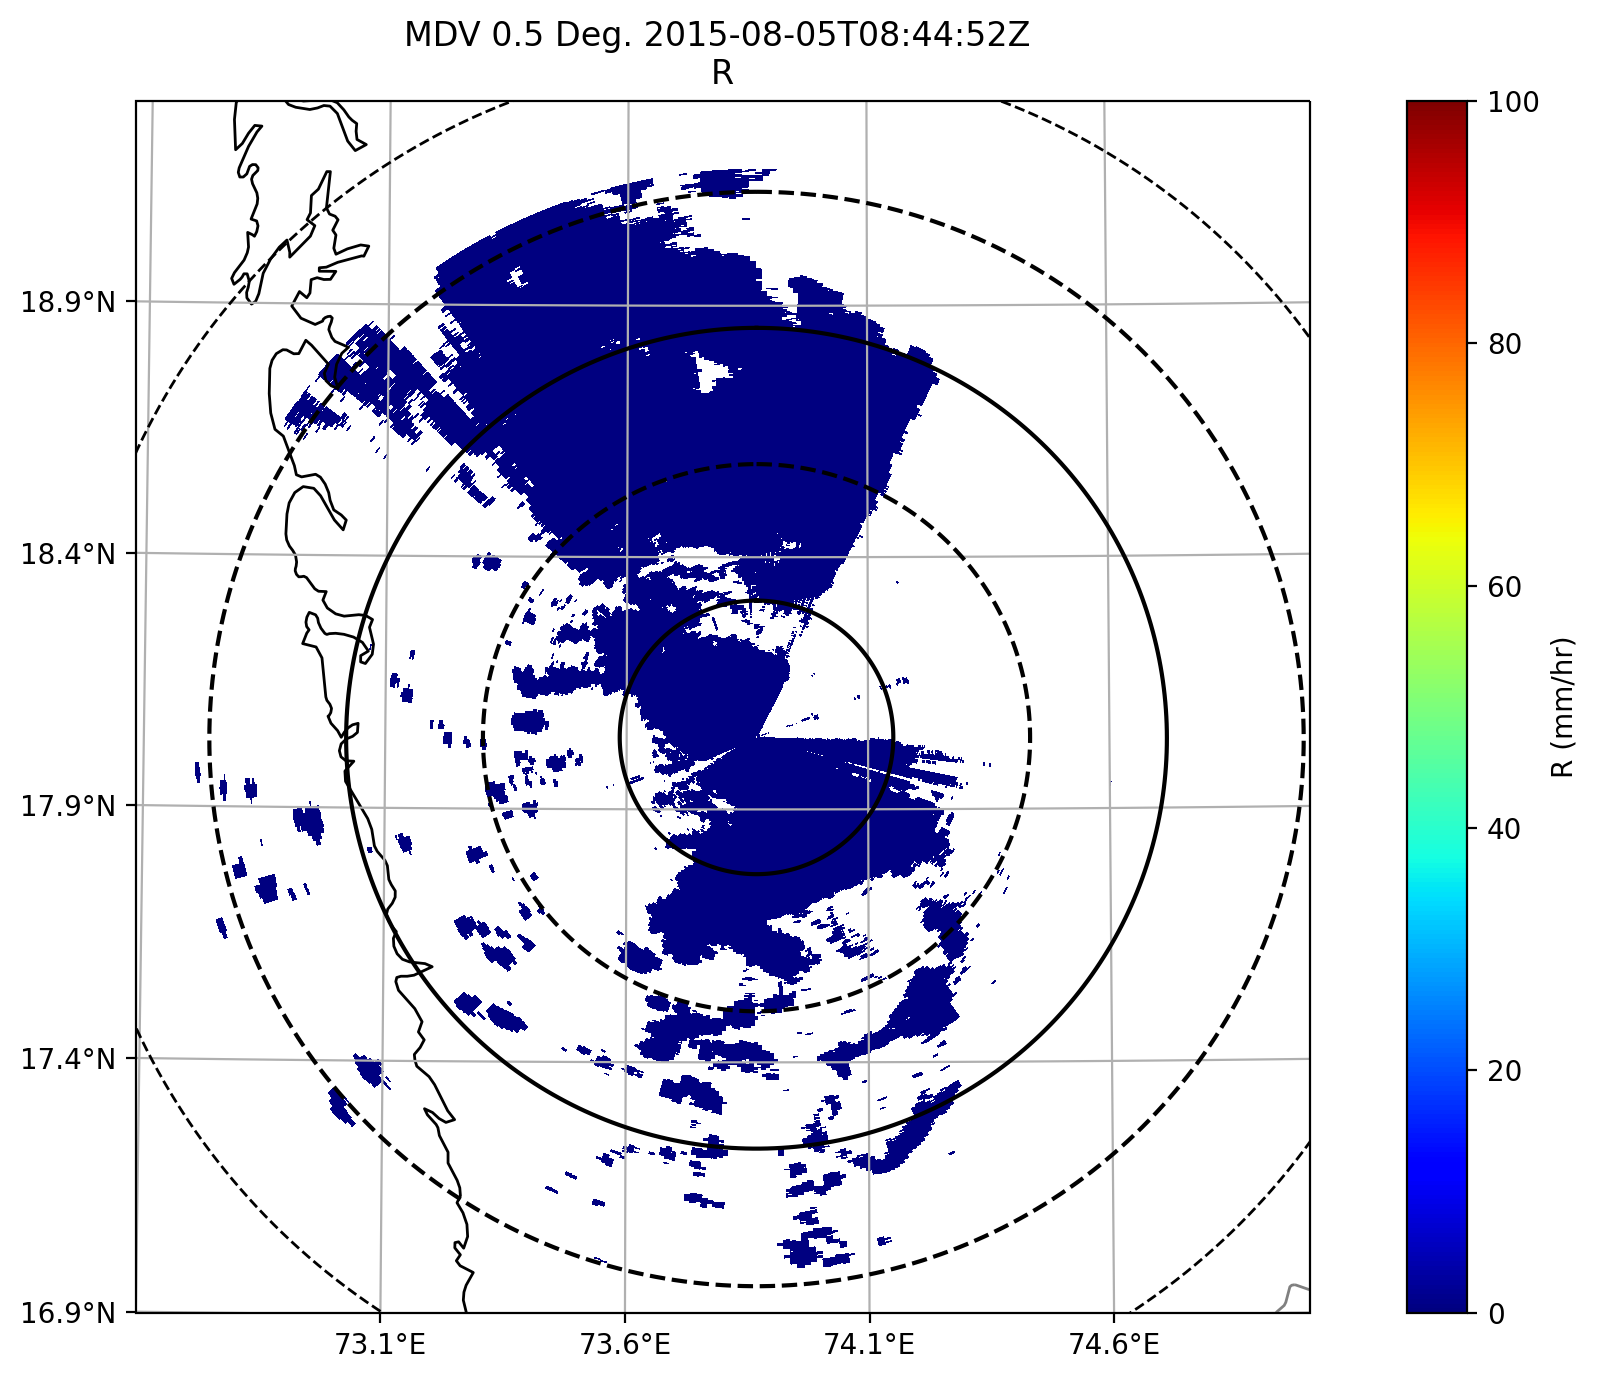

In [26]:
fig = plt.figure(figsize=[10,7],dpi=200)
display.plot_ppi_map('R', 0, vmin=0, vmax=100,
                     min_lon=72.6, max_lon=75, min_lat=16.9, max_lat=19.3,
                     lon_lines=np.arange(72.6,75, .5), resolution='10m',
                     lat_lines=np.arange(16.9,19.3, .5), projection=projection,
                     fig=fig, lat_0=radar.latitude['data'][0],
                     lon_0=radar.longitude['data'][0],cmap='jet')


# Plot range rings at 10, 20, 30, 40km
display.plot_range_ring(30., line_style='k-')
display.plot_range_ring(60., line_style='k--')
display.plot_range_ring(90., line_style='k-')
display.plot_range_ring(120., line_style='k--')
display.plot_range_ring(150., line_style='k--',lw=1)
# Plot cross hairs
#display.plot_line_xy(np.array([-120000.0, 120000.0]), np.array([0.0, 0.0]),
                     #line_style='k-')
#display.plot_line_xy(np.array([0.0, 0.0]), np.array([-20000.0, 200000.0]),
                     #line_style='k-')

# Indicate the radar location with a point
# display.plot_point(radar.longitude['data'][0], radar.latitude['data'][0])

fig.tight_layout()
plt.show()

In [31]:
R10=R.copy()

In [33]:
R10.shape

(9270, 2500)

In [34]:
R10=R10*

masked_array(
  data=[[0.12303892523050308, 0.15376456081867218, 0.1632024496793747,
         ..., --, --, --],
        [0.10380791127681732, 0.14727507531642914, 0.1632024496793747,
         ..., --, --, --],
        [0.11557834595441818, 0.14396530389785767, 0.15376456081867218,
         ..., --, --, --],
        ...,
        [0.10781670361757278, 0.13023729622364044, 0.14727507531642914,
         ..., --, --, --],
        [0.10781670361757278, 0.13023729622364044, 0.14727507531642914,
         ..., --, --, --],
        [0.09970398247241974, 0.13374805450439453, 0.16009369492530823,
         ..., --, --, --]],
  mask=[[False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True],
        ...,
        [False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True]],
  fill_value=-32768,
  d

In [37]:
radar0 = pyart.io.read('MDV-20150805-075444-PPIVol.nc')

In [41]:
z0 = radar0.fields['DBZH']['data']